# Data Exploration for station.csv

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
stations = pd.read_csv('/content/station.csv')

In [3]:
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [4]:
stations.shape

(70, 7)

 As we can see from the shape, this one will be easier to handle.

#### Figuring out the null values

In [5]:
# Count the number of missing values in each column
stations.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

##### Great, there doesn't seem to be any null values

Also, there doesn't seem to be any sort of zip codes for us to find the location for the city. So we might need to figure out something about that.

In [6]:
# Count the unique city names
stations['city'].nunique()

5

In [7]:
# Get the datatypes of each column
stations.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

##### Just like before, we can see that the 'installation_date' is of type object probably <str>. We can easily convert it to something workable.

In [8]:
stations.installation_date = pd.to_datetime(stations.installation_date)
stations['installation_date'] = stations.installation_date.dt.date

# Get the stats for 'installation_date' column
stations['installation_date'].describe()

count             70
unique            17
top       2013-08-23
freq               7
Name: installation_date, dtype: object

In [9]:
# Get the max for 'installation_date' column
stations['installation_date'].max()

datetime.date(2014, 4, 9)

In [10]:
# Get the min for 'installation_date' column
stations['installation_date'].min()

datetime.date(2013, 8, 5)

In [11]:
# List the unique city names
stations['city'].unique()


array(['San Jose', 'Redwood City', 'Mountain View', 'Palo Alto',
       'San Francisco'], dtype=object)

We can see that there are these cities. We can find out the zip codes that fall into these cities and then filter the trips dataset based on that as it seems to have weird zip code values. (We already did this in the weather explore file)

Zip Code----------------------------City

94107 ------------------------------ SF<br>
94063 ------------------------------ SM (Redwood)<br>
94301 ------------------------------ SC<br>
94041 ------------------------------ MW<br>
95113 ------------------------------ SJ<br>

In [12]:
# Create df's filtered by city
san_francisco = stations[stations['city'] == 'San Francisco']
san_jose = stations[stations['city'] == 'San Jose']
redwood_city = stations[stations['city'] == 'Redwood City']
palo_alto = stations[stations['city'] == 'Palo Alto']
mountain_view = stations[stations['city'] == 'Mountain View']


In [13]:
san_francisco.head()

,id,name,lat,long,dock_count,city,installation_date
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,2013-08-19
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,2013-08-19
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,2013-08-19
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,2013-08-19
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,2013-08-19


In [14]:
san_jose.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


In [15]:
# Reset the head of all df's
san_francisco.reset_index(drop=True, inplace=True)
san_jose.reset_index(drop=True, inplace=True)
redwood_city.reset_index(drop=True, inplace=True)
palo_alto.reset_index(drop=True, inplace=True)
mountain_view.reset_index(drop=True, inplace=True)

In [16]:
san_francisco.head()

,id,name,lat,long,dock_count,city,installation_date
0,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,2013-08-19
1,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,2013-08-19
2,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,2013-08-19
3,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,2013-08-19
4,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,2013-08-19


In [17]:
san_jose.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-05
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-07


In [18]:
redwood_city.head()

,id,name,lat,long,dock_count,city,installation_date
0,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,2013-08-12
1,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,2013-08-15
2,23,San Mateo County Center,37.487616,-122.229951,15,Redwood City,2013-08-15
3,24,Redwood City Public Library,37.484219,-122.227424,15,Redwood City,2013-08-12
4,25,Stanford in Redwood City,37.485370,-122.203288,15,Redwood City,2013-08-12


In [19]:
palo_alto.head()

,id,name,lat,long,dock_count,city,installation_date
0,34,Palo Alto Caltrain Station,37.443988,-122.164759,23,Palo Alto,2013-08-14
1,35,University and Emerson,37.444521,-122.163093,11,Palo Alto,2013-08-15
2,36,California Ave Caltrain Station,37.429082,-122.142805,15,Palo Alto,2013-08-14
3,37,Cowper at University,37.448598,-122.159504,11,Palo Alto,2013-08-14
4,38,Park at Olive,37.425684,-122.137777,15,Palo Alto,2013-08-14


In [20]:
mountain_view.head()

,id,name,lat,long,dock_count,city,installation_date
0,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,2013-08-16
1,28,Mountain View Caltrain Station,37.394358,-122.076713,23,Mountain View,2013-08-15
2,29,San Antonio Caltrain Station,37.406940,-122.106758,23,Mountain View,2013-08-15
3,30,Evelyn Park and Ride,37.390277,-122.066553,15,Mountain View,2013-08-16
4,31,San Antonio Shopping Center,37.400443,-122.108338,15,Mountain View,2013-12-31


In [24]:
# Write all df's to csv files
san_francisco.to_csv('/content/station_san_francisco.csv', index=False)
san_jose.to_csv('/content/station_san_jose.csv', index=False)
redwood_city.to_csv('/content/station_redwood_city.csv', index=False)
palo_alto.to_csv('/content/station_palo_alto.csv', index=False)
mountain_view.to_csv('/content/station_mountain_view.csv', index=False)


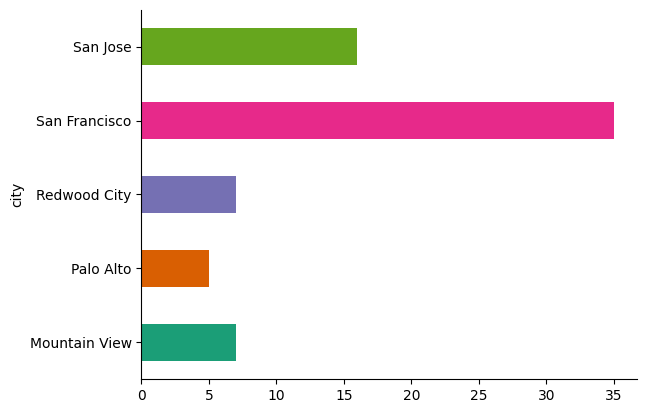

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
stations.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def create_heatmap(annote = None):
    # Create a heatmap of the station data
    plt.figure(figsize=(10,10))
    if annote is not None:
        sb.heatmap(station_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
    else:
        sb.heatmap(station_df.corr(), fmt='.1f', cmap='coolwarm')
    plt.show()

(From the source: https://absentdata.com/python-graphs/create-a-heat-map-with-seaborn/)

We can't seem to correlate strings. So we might be able to extract coordinates and then station count

In [22]:
# Extract lat and long into np.array
lat = stations['lat'].values
long = stations['long'].values

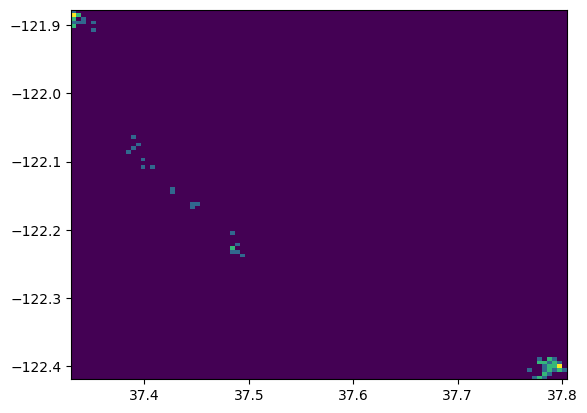

In [23]:
plt.hist2d(lat,long, bins=100)
plt.show()

#### This doesn't seem to tell us much.

Now, lets try making a google maps figure to visualize the stations

check googleMaps_stations.ipynb

#### **The maps doesn't show up in vs code, but shows up in jupyter notebook.**